In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
import warnings

In [2]:
iris_data = pd.read_csv("iris.csv")

In [3]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
iris_data = iris_data.drop("Id", axis=1)

In [10]:
X = iris_data.drop("Species", axis=1)
y = iris_data["Species"]

Displaying Pairplot for knowing the relationship between the features.

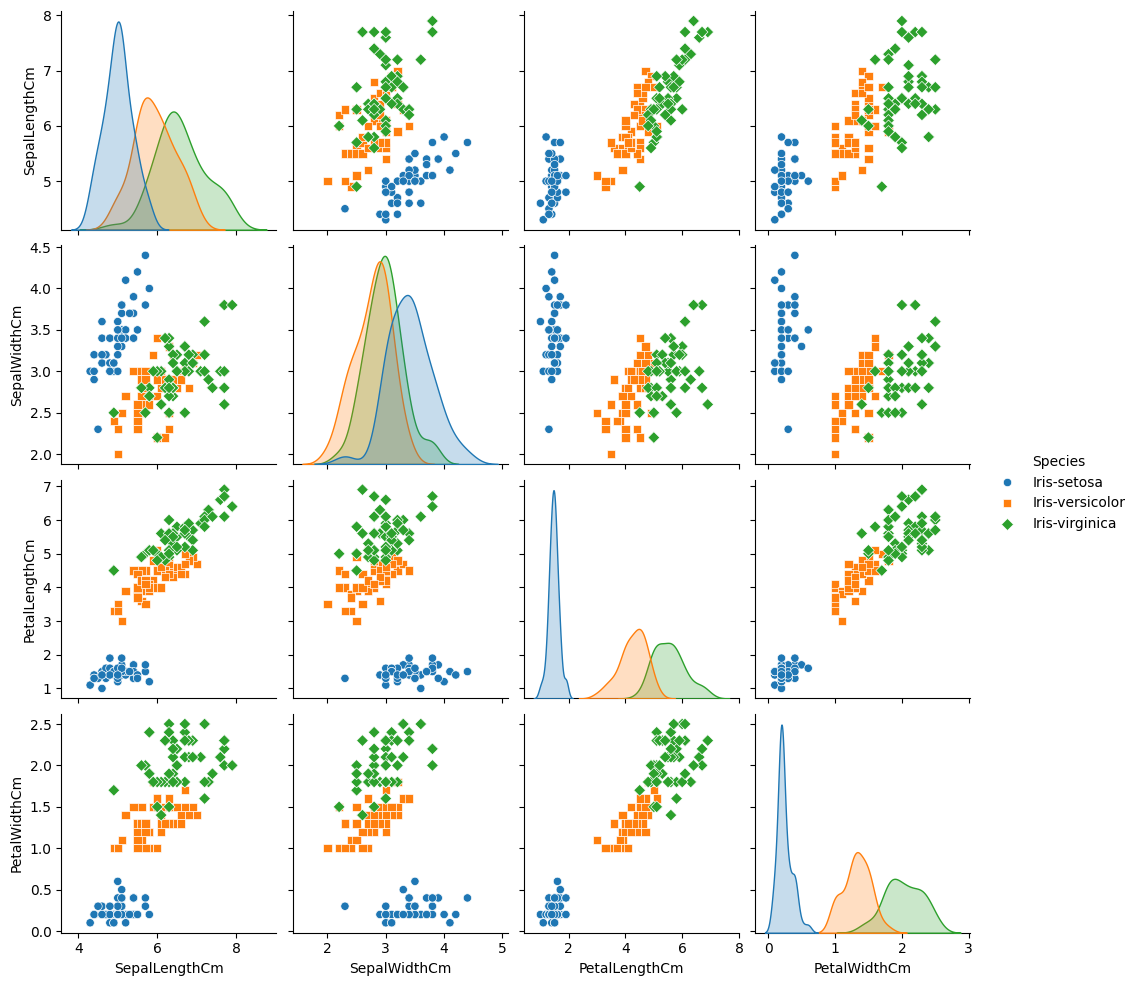

In [15]:
sns.pairplot(iris_data, hue="Species", markers=["o", "s", "D"])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
y_pred = dt_classifier.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [19]:
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Displaying the decision tree

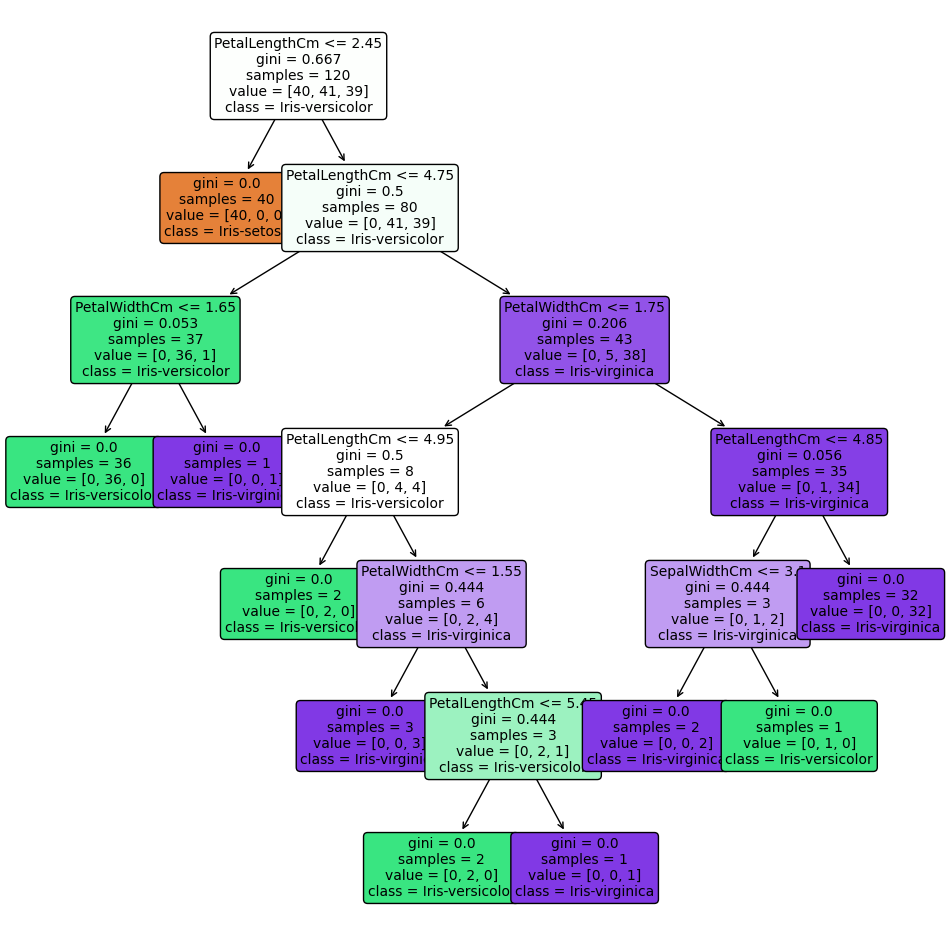

In [21]:
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(dt_classifier, feature_names=X.columns, class_names=iris_data['Species'].unique(), filled=True, rounded=True, fontsize=10)
plt.show()

Predicting the Species by giving certain input to the model

In [32]:
warnings.filterwarnings("ignore")
new_data = [[5.1, 3.5, 1.4, 0.2]]  
predicted_species = dt_classifier.predict(new_data)
print("\nPredicted Species for New Data:", predicted_species)


Predicted Species for New Data: ['Iris-setosa']


In [33]:
warnings.filterwarnings("ignore")
new_data = [[6.3, 3.3, 4.7, 1.6]]  
predicted_species = dt_classifier.predict(new_data)
print("\nPredicted Species for New Data:", predicted_species)


Predicted Species for New Data: ['Iris-versicolor']


In [34]:
warnings.filterwarnings("ignore")
new_data = [[7.3, 6, 6.1, 2.1]]  
predicted_species = dt_classifier.predict(new_data)
print("\nPredicted Species for New Data:", predicted_species)


Predicted Species for New Data: ['Iris-virginica']
